# Avaliação #4: Modelagem e Mineração de Dados
## Mestrado em Modelagem Matemática da Informação
### Professor: Renato Souza                                                      ||  22-09-2016
### Aluna: Laura Sant'Anna

____

## Mobilidade Urbana no Rio de Janeiro - Microdados do PDTU

Slides: 1º - Nome e título, 2º - Problema, 3º - Método, 4º - Resultados, 5º - Conclusões

Contéudo do trabalho: Coleta (tipo de dados), Tratamento (ferramentas), Armazenamento (banco de dados), Visualizações e análise (biblioteca), Conclusões

In [215]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as md
import scipy.stats as ss
import seaborn as sns
import cufflinks as cf
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
import os
from collections import Counter

In [3]:
datapath = "C:/Users/Laura/Desktop/EMAP/Mineração de Dados/Trab4/PesquisaOD"
outputs = "C:/Users/Laura/Desktop/EMAP/Mineração de Dados/Trab4/outputs/"

### Bases de dados

Vamos trabalhar com 4 planilhas xlsx contendo as pesquisas OD conduzidas nas estações de barcas, metrô, trem e nas ruas (abordagem a motoristas de automóveis e passageiros de ônibus).

In [4]:
dataset1 = "Pequisa_Interceptação(Individual_e_Coletivo).xlsx"
dataset2 = "Pequisa_OD_Barcas.xlsx"
dataset3 = "Pequisa_OD_Metrô.xlsx"
dataset4 = "Pequisa_OD_Supervia.xlsx"

motivo = "Motivo.xlsx"
origem_bairros = "RA_AP_Orig.xlsx"
destino_bairros = "RA_AP_Dest.xlsx"
origem_mun = "RA_AP_Mun_Orig.xlsx"
destino_mun = "RA_AP_Mun_Dest.xlsx"

#### Automóveis, táxis, motos e Ônibus

In [371]:
auto_bus0 = pd.read_excel(os.path.join(datapath,dataset1))
auto_bus0.head()
#auto_bus0.info()

,Id_pesq,Data,Hora_completa,Hora,Modo,Posto,Sentido,Ocupantes,Orig_Bairro,Orig_Municipio,...,Dest_Bairro,Dest_Municipio,DEST_ZT,DestMotivo,Sexo,FxEtaria,Resid_Bairro,Resid_Municipio,RESID_ZT,Fator_exp
0,I_MA14221,2012-12-06,09:54:00,9.0,Auto,123,A,2,Madureira,Rio De Janeiro,...,Barra Da Tijuca,Rio De Janeiro,377,4.0,1.0,4.0,NaN,NaN,0,71.411765
1,I_MA14223,2012-12-06,10:00:00,10.0,Auto,123,A,1,Madureira,Rio De Janeiro,...,Jardim Sulacap,Rio De Janeiro,400,7.0,1.0,2.0,NaN,NaN,0,24.355556
2,I_MA14225,2012-12-06,10:05:00,10.0,Auto,123,A,2,Vila Valqueire,Rio De Janeiro,...,Jardim Sulacap,Rio De Janeiro,400,1.0,1.0,6.0,NaN,NaN,0,24.355556
3,I_MA14226,2012-12-06,10:07:00,10.0,Auto,123,A,1,Anchieta,Rio De Janeiro,...,Taquara,Rio De Janeiro,354,1.0,1.0,NaN,NaN,NaN,0,24.355556
4,I_MA14227,2012-12-06,10:10:00,10.0,Auto,123,A,4,Iraja,Rio De Janeiro,...,Barra Da Tijuca,Rio De Janeiro,377,1.0,2.0,2.0,NaN,NaN,0,24.355556


In [253]:
auto_bus0["Modo"].value_counts()

Onibus    31600
Auto      24223
Taxi        941
Moto        841
auto        447
AUTO          8
Name: Modo, dtype: int64

In [289]:
auto_bus0["DestMotivo"].value_counts()

1.0    21170
2.0    19652
7.0     7199
3.0     1834
4.0     1816
6.0     1726
5.0     1217
Name: DestMotivo, dtype: int64

In [255]:
auto_bus0["Sexo"].value_counts() #mulher = 2

1.0    34909
2.0    19141
Name: Sexo, dtype: int64

In [256]:
auto_bus0["FxEtaria"].value_counts()

3.0    15544
4.0    14057
2.0    13169
5.0     7509
6.0     2030
1.0     1313
Name: FxEtaria, dtype: int64

#### Metrô

In [268]:
metro0 = pd.read_excel(os.path.join(datapath,dataset3))
metro0.head()
#metro0.info()

,ID,Data,Hora,Minuto,Estacao,Modo_Antes,Estacao_Embarque,Bus_Mun_Inter,Duracao_Antes,Orig_Mun,...,Dest_Mun,Dest_Bairro,DestResid?,Resid_Mun,Resid_Bairro,Modo_depois,Duracao_Depois,ZT_ORIG,ZT_DEST,Fator_exp
0,1,2012-12-12,7,3.0,Uruguaiana,A pé,NaN,NaN,11 a 15 min,Rio De Janeiro,...,Rio De Janeiro,Gloria,S,Rio De Janeiro,NaN,A pé,Até 10 min,109,54,15.400625
1,2,2012-12-12,7,8.0,Uruguaiana,Ônibus,NaN,I,Mais de 30 min,Niteroi,...,Rio De Janeiro,Leme,N,Rio De Janeiro,NaN,A pé,11 a 15 min,646,76,15.400625
2,3,2012-12-12,7,15.0,Uruguaiana,Ônibus,NaN,I,Mais de 30 min,Sao Goncalo,...,Rio De Janeiro,Catete,N,Rio De Janeiro,NaN,A pé,Até 10 min,690,55,15.400625
3,4,2012-12-12,7,20.0,Uruguaiana,Metrô,Pavuna,NaN,Mais de 30 min,Rio De Janeiro,...,Rio De Janeiro,Ipanema,N,Rio De Janeiro,NaN,Ônibus,11 a 15 min,320,94,15.400625
4,5,2012-12-12,7,25.0,Uruguaiana,Trem,Pavuna,NaN,Mais de 30 min,Sao Joao De Meriti,...,Rio De Janeiro,Catete,N,Rio De Janeiro,NaN,A pé,Até 10 min,718,55,15.400625


In [269]:
trem0["Motivo"].value_counts()

Trabalho    21048
Outros       2885
Escola       1655
Lazer        1103
Saude         576
Negocios      375
ND             32
Name: Motivo, dtype: int64

In [225]:
metro0["Pgto"].value_counts()

Dinheiro                   4284
RioCard                    3626
Bilhete Único              2029
Bilhete Único Carioca      1974
Pré-pago Metrorio          1271
Gratuidade                  552
dinheiro                    412
riocard                     307
gratuidade                   99
Integração Trem/Metrô        58
Unitário Metrorio            53
bilhete único carioca        25
Integração Onibus/Metrô      13
Bilhete único Carioca        13
bilhete Único                12
Name: Pgto, dtype: int64

In [258]:
metro0["Duracao_Antes"].value_counts()

Até 10 min        8987
Mais de 30 min    2038
11 a 15 min       1860
16 a 20 min       1112
21 a 30 min        816
mais de 30 min       2
até 10 min           2
Name: Duracao_Antes, dtype: int64

In [261]:
metro0["Modo_Antes"].value_counts()

A pé         9102
Ônibus       3249
Metrô         961
Carro         461
Van           384
Trem          249
trem          151
carro         105
Outros         99
Moto           50
outros         20
van            17
Bicicleta      11
Name: Modo_Antes, dtype: int64

In [257]:
metro0["Duracao_Depois"].value_counts()

Até 10 min        8127
11 a 15 min       2463
Mais de 30 min    1428
16 a 20 min       1101
ND                 734
21 a 30 min        654
mais de 30 min     363
até 10 min          16
Name: Duracao_Depois, dtype: int64

In [260]:
metro0["Modo_depois"].value_counts()

A pé         10158
Ônibus        3184
Trem           707
Metrô          239
Carro          179
Van             88
outros          65
Outros          60
TREM            37
trem            36
van             30
Moto            13
carro           13
VAN              5
a pé             3
Bicicleta        3
CARRO            3
BICICLETA        1
Name: Modo_depois, dtype: int64

#### Trem

In [383]:
trem0 = pd.read_excel(os.path.join(datapath,dataset4))
trem0.head()
#trem0.info()

,ID,Data,Hora,Minuto,Periodo,Estacao,Modo_Antes,Estacao_Antes,Bus_Mun_Inter,Duracao_Antes,...,Est_Desemb,Est_Transf,Modo_Depois,Dest_Mun,Dest_Bairro,Duracao_Depois,Fator_Periodo,Fator_Dia,ZT_ORIG,ZT_DEST
0,1,2012-03-07,17,9,PT,Pilares,Ônibus,NaN,M,Até 10 min,...,Belford Roxo,NaN,Ônibus,Belford Roxo,Itaipu,21 a 30 min,3.976190,5.144911,223,460
1,2,2012-03-07,17,53,PT,Tomaz Coelho,Ônibus,NaN,M,21 a 30 min,...,Belford Roxo,NaN,Ônibus,Belford Roxo,Maringa,16 a 20 min,2.258503,2.770910,220,465
2,3,2012-03-08,17,48,PT,Mercadão de Madureira,Ônibus,NaN,M,Mais de 30 min,...,Belford Roxo,NaN,Ônibus,Belford Roxo,Santa Maria,21 a 30 min,8.927461,13.335234,0,465
3,4,2012-03-08,16,35,PT,Madureira,Ônibus,NaN,M,Mais de 30 min,...,Belford Roxo,NaN,Ônibus,Belford Roxo,Sao Bernardo,Mais de 30 min,18.300000,32.854432,335,462
4,5,2012-03-08,16,23,PT,Mercadão de Madureira,Ônibus,NaN,M,21 a 30 min,...,Belford Roxo,NaN,Ônibus,Belford Roxo,Itaipu,Mais de 30 min,8.927461,13.335234,335,460


In [267]:
trem0["Motivo"].value_counts()

Trabalho    21048
Outros       2885
Escola       1655
Lazer        1103
Saude         576
Negocios      375
ND             32
Name: Motivo, dtype: int64

In [263]:
trem0["Pgto"].value_counts()

Dinheiro                    11243
RioCard                      9636
BU carioca                   4495
BU Metropolit.                935
Gratuidade                    792
Integ. onibus / supervia      266
Intrg. Trem/Metro             214
Evasor                         62
ND                             31
Name: Pgto, dtype: int64

In [262]:
trem0["Duracao_Antes"].value_counts()

Até 10 min        14804
11 a 15 min        5826
16 a 20 min        2814
Mais de 30 min     2467
21 a 30 min        1680
Name: Duracao_Antes, dtype: int64

In [264]:
trem0["Modo_Antes"].value_counts()

A pé         16652
Ônibus        5900
Trem          2665
Van            728
Metrô          631
Carro          481
Bicicleta      279
Moto           229
Outros          81
ND              28
Name: Modo_Antes, dtype: int64

In [265]:
trem0["Duracao_Depois"].value_counts()

Até 10 min        11112
11 a 15 min        6631
16 a 20 min        4100
Mais de 30 min     2720
21 a 30 min        2503
ND                  608
Name: Duracao_Depois, dtype: int64

In [266]:
trem0["Modo_Depois"].value_counts()

A pé         17543
Ônibus        6863
Metrô         2228
Van            446
ND             136
Bicicleta      116
Outros         102
Trem            85
Moto            78
Carro           77
Name: Modo_Depois, dtype: int64

#### Barcas

In [384]:
barcas0 = pd.read_excel(os.path.join(datapath,dataset2))
barcas0.head()
#barcas0.info()

,ID,Data,Hora,Minuto,Linha,Sentido,Motivo,Orig_Mun,Orig_Bairro,Modo_Antes,Linha_Antes,Dest_Mun,Dest_Bairro,Modo_Depois,Linha_Depois,Pgto,ZT_ORIG,ZT_DEST,Fator_exp
0,1,2010-11-24,8,24,Rio de Janeiro - Charitas,Charitas,Trabalho,Rio De Janeiro,Vila Da Penha,Carro,NaN,Niteroi,Icarai,Ônibus Municipal,33.0,Dinheiro,245,642,20.487875
1,2,2010-11-24,8,26,Rio de Janeiro - Charitas,Charitas,Outros,Rio De Janeiro,Copacabana,Táxi,NaN,Niteroi,Itaipu,Ônibus Intermunicipal,46.0,Dinheiro,89,604,20.487875
2,3,2010-11-24,8,29,Rio de Janeiro - Charitas,Charitas,Trabalho,Rio De Janeiro,Meier,Táxi,NaN,Niteroi,Itaipu,Carro,NaN,Dinheiro,220,604,20.487875
3,4,2010-11-24,8,30,Rio de Janeiro - Charitas,Charitas,Outros,Rio De Janeiro,Centro,Carro,NaN,Niteroi,Itaipu,Carro,NaN,Dinheiro,109,604,20.487875
4,5,2010-11-24,9,1,Rio de Janeiro - Charitas,Rio de Janeiro,Trabalho,Niteroi,Piratininga,Carro,NaN,Rio De Janeiro,Centro,A pé,NaN,Dinheiro,604,109,6.560769


In [272]:
barcas0["Motivo"].value_counts()

Trabalho             1855
Estudo                150
Lazer/Compras         109
Outros                 81
Saúde                  53
Trabalho/Negócios      12
Não informado           5
Name: Motivo, dtype: int64

In [273]:
barcas0["Modo_Antes"].value_counts()

A pé                     982
Ônibus Municipal         463
Carro                    452
Metrô                    135
Táxi                      99
Van                       52
Ônibus Intermunicipal     25
Trem                      24
Moto                      18
Outros                     6
Bicicleta                  3
Name: Modo_Antes, dtype: int64

In [274]:
barcas0["Modo_Depois"].value_counts()

A pé                     1205
Ônibus Municipal          386
Carro                     277
Metrô                     114
Van                       109
Táxi                       86
Ônibus Intermunicipal      37
Trem                       31
Moto                        7
Outros                      5
Name: Modo_Depois, dtype: int64

In [275]:
barcas0["Pgto"].value_counts()

Dinheiro            1155
Bilhete Único        521
RioCard Expresso     425
Grátis Idoso          76
Vale Transporte       46
Outros                17
Grátis Estudante      10
Grátis Especial        1
Name: Pgto, dtype: int64

#### Criando um dataset único

Claramente as bases de dados não contém as mesmas informações para cada observação, então vamos manter apenas as variáveis comuns às quatro para juntá-las em uma base única:

In [9]:
#criando cópias das bases originais
auto_bus = auto_bus0.copy()
metro= metro0.copy()
trem = trem0.copy()
barcas = barcas0.copy()

In [10]:
#renomeando variáveis que estão com nome diferente em auto_bus
auto_bus.rename(columns={'Id_pesq': 'ID', 'Orig_Municipio': 'Orig_Mun', 'Dest_Municipio': 'Dest_Mun', 'ORIG_ZT': 'ZT_ORIG',
                         'DEST_ZT': 'ZT_DEST', 'DestMotivo': 'Motivo', 'Modo': 'Modal'}, inplace=True)

#merge entre a tabela auto_bus e a tabela de motivos e depois vamos manter apenas a coluna com a legenda:
motivos = pd.read_excel(os.path.join(datapath,motivo))
auto_bus = pd.merge(auto_bus, motivos, how='outer', on='Motivo')
auto_bus = auto_bus.drop('Motivo',1)
auto_bus.rename(columns={'Motivo_legenda': 'Motivo'}, inplace=True)


In [11]:
#criando uma coluna Modal nas bases de metro, trem e barcas
metro.insert(3,'Modal','Metro')
trem.insert(3,'Modal','Trem')
barcas.insert(3,'Modal','Barca')

#criando uma coluna Ocupantes - para padronizar com auto - nas bases de metro, trem e barcas
metro.insert(4,'Ocupantes',1)
trem.insert(4,'Ocupantes',1)
barcas.insert(4,'Ocupantes',1)

In [12]:
#lista de variáveis que vão ser mantidas
var = ['Hora', 'Motivo', 'Modal', 'Ocupantes','Orig_Mun', 'Orig_Bairro', 'Dest_Mun', 'Dest_Bairro']

auto_bus = auto_bus[var]
metro = metro[var]
trem = trem[var]
barcas = barcas[var]

Agora temos um dataset único com todos os modais de transporte:

In [13]:
frames = [auto_bus, metro, trem, barcas]

dataset = pd.concat(frames, ignore_index=True)

In [14]:
#merge com as tabelas de RA e AP de origem e destino
RA_AP_orig = pd.read_excel(os.path.join(datapath, origem_bairros))
dataset = pd.merge(dataset, RA_AP_orig, how='outer', on='Orig_Bairro')

RA_AP_dest = pd.read_excel(os.path.join(datapath, destino_bairros))
dataset = pd.merge(dataset, RA_AP_dest, how='outer', on='Dest_Bairro')

Agora vamos padronizar os outros municípios da RMRJ e criar um padrão para não informado e fora RMRJ:

In [15]:
dataset = dataset.replace(['Nao Identificado', 'Nao Informado', 'Nao informado', 'NAO IDENTIFICADO', 'NAO INFORMADO', 
                           'ND', 'Rio De Janeiro'], [nan, nan, nan, nan, nan, nan, 'Rio de Janeiro']) 

In [18]:
for i in tqdm(range(len(dataset))):
    if dataset.loc[i,'Orig_Mun'] != 'Rio de Janeiro':
        dataset.loc[i,'Orig_RA'] = dataset.loc[i,'Orig_Mun']
        dataset.loc[i,'Orig_AP'] = dataset.loc[i,'Orig_Mun']
    if dataset.loc[i,'Dest_Mun'] != 'Rio de Janeiro':
        dataset.loc[i,'Dest_RA'] = dataset.loc[i,'Dest_Mun']
        dataset.loc[i,'Dest_AP'] = dataset.loc[i,'Dest_Mun']

In [19]:
#merge com a lista de municípios da RMRJ pra deixar tudo bonitinho finalmente
RA_AP_mun_orig = pd.read_excel(os.path.join(datapath, origem_mun))
dataset = pd.merge(dataset, RA_AP_mun_orig, how='outer', on='Orig_Mun')

RA_AP_mun_dest = pd.read_excel(os.path.join(datapath, destino_mun))
dataset = pd.merge(dataset, RA_AP_mun_dest, how='outer', on='Dest_Mun')

In [20]:
for i in tqdm(range(len(dataset))):
    if dataset.loc[i,'Orig_Mun'] != 'Rio de Janeiro':
        dataset.loc[i,'Orig_RA'] = dataset.loc[i,'RA_mun_orig']
        dataset.loc[i,'Orig_AP'] = dataset.loc[i,'AP_mun_orig']
    if dataset.loc[i,'Dest_Mun'] != 'Rio de Janeiro':
        dataset.loc[i,'Dest_RA'] = dataset.loc[i,'RA_mun_dest']
        dataset.loc[i,'Dest_AP'] = dataset.loc[i,'AP_mun_dest']

In [21]:
var = ['Hora', 'Motivo', 'Modal', 'Ocupantes', 'Orig_Mun', 'Orig_Bairro', 'Orig_RA','Orig_AP','Dest_Mun', 'Dest_Bairro', 
       'Dest_RA', 'Dest_AP']

dataset = dataset[var]

In [22]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103053 entries, 0 to 103052
Data columns (total 12 columns):
Hora           102648 non-null float64
Motivo         98956 non-null object
Modal          102893 non-null object
Ocupantes      102893 non-null float64
Orig_Mun       102654 non-null object
Orig_Bairro    101704 non-null object
Orig_RA        102017 non-null object
Orig_AP        102017 non-null object
Dest_Mun       102049 non-null object
Dest_Bairro    101581 non-null object
Dest_RA        101691 non-null object
Dest_AP        101691 non-null object
dtypes: float64(2), object(10)
memory usage: 10.2+ MB


In [386]:
dataset.head()

,Hora,Motivo,Modal,Ocupantes,Orig_Mun,Orig_Bairro,Orig_RA,Orig_AP,Dest_Mun,Dest_Bairro,Dest_RA,Dest_AP
0,9.0,Lazer/Compras,Auto,2.0,Rio de Janeiro,Madureira,XV RA - Madureira,AP III,Rio de Janeiro,Barra Da Tijuca,XXIV RA - Barra da Tijuca,AP IV
1,8.0,Lazer/Compras,Onibus,1.0,Rio de Janeiro,Madureira,XV RA - Madureira,AP III,Rio de Janeiro,Barra Da Tijuca,XXIV RA - Barra da Tijuca,AP IV
2,15.0,Lazer/Compras,Onibus,1.0,Rio de Janeiro,Madureira,XV RA - Madureira,AP III,Rio de Janeiro,Barra Da Tijuca,XXIV RA - Barra da Tijuca,AP IV
3,11.0,Lazer/Compras,Onibus,1.0,Rio de Janeiro,Madureira,XV RA - Madureira,AP III,Rio de Janeiro,Barra Da Tijuca,XXIV RA - Barra da Tijuca,AP IV
4,12.0,Lazer/Compras,Onibus,1.0,Rio de Janeiro,Madureira,XV RA - Madureira,AP III,Rio de Janeiro,Barra Da Tijuca,XXIV RA - Barra da Tijuca,AP IV


In [385]:
#Criando uma lista com as regiões administrativas da RMRJ
RA_orig = set(list(dataset['Orig_RA']))
RA_dest = set(list(dataset['Dest_RA']))
RA = sorted(list(RA_orig.union(RA_dest)), key=str)
RA

['Belford Roxo',
 'Duque De Caxias',
 'FORA_RMRJ',
 'Guapimirim',
 'I RA - Portuária',
 'II RA- Centro',
 'III RA - Rio Comprido',
 'IV RA - Botafogo',
 'IX RA - Vila Isabel',
 'Itaboraí',
 'Itaguaí',
 'Japeri',
 'Magé',
 'Mangaratiba',
 'Maricá',
 'Mesquita',
 'Nilópolis',
 'Niterói',
 'Nova Iguaçu',
 'Paracambi',
 'Queimados',
 'Seropedica',
 'São Gonçalo',
 'São João de Meriti',
 'Tanguá',
 'V RA - Copacabana',
 'VI RA - Lagoa',
 'VII RA - São Cristóvão',
 'VIII RA - Tijuca',
 'X RA - Ramos',
 'XI RA - Penha',
 'XII RA - Inhaúma',
 'XIII RA - Méier',
 'XIV RA - Irajá',
 'XIX RA - Santa Cruz',
 'XV RA - Madureira',
 'XVI RA - Jacarepaguá',
 'XVII RA - Bangu',
 'XVIII RA - Campo Grande',
 'XX RA - Ilha do Governador',
 'XXI RA - Ilha de Paquetá',
 'XXII RA - Anchieta',
 'XXII RA - Santa Teresa',
 'XXIV RA - Barra da Tijuca',
 'XXIX RA - Complexo do Alemão',
 'XXV RA - Pavuna',
 'XXVI RA - Guaratiba',
 'XXVII RA - Rocinha',
 'XXVIII RA - Jacarezinho',
 'XXX RA - Complexo da Maré',
 'XX

## Matriz origem-destino por Modal

Primeiro vamos ver como estão aparecendo os modais no dataset pra depois padronizar:

In [24]:
dataset["Modal"].value_counts()

Onibus    31604
Trem      27677
Auto      24223
Metro     14887
Barca      2265
Taxi        941
Moto        841
auto        447
AUTO          8
Name: Modal, dtype: int64

In [25]:
dataset = dataset.replace(['auto','AUTO', 'Taxi', 'Moto'], ['Auto', 'Auto', 'Auto', 'Auto'])

In [26]:
#Ordenando o dataset
dataset_sorted = dataset.sort_values(['Modal','Orig_RA','Dest_RA'])

#### Carro, Taxi ou Moto

In [323]:
auto = dataset_sorted[dataset_sorted.Modal == 'Auto'].reset_index(drop=True)

OD_auto = pd.DataFrame(0, index=RA, columns = RA)

In [325]:
for b in tqdm(RA):
    
    for i in range(len(auto)):     

        if auto.loc[i,'Orig_RA'] == b:

            OD_auto.loc[b, auto.loc[i,'Dest_RA']] += int(auto.loc[i,'Ocupantes']) 
        
    if sum(OD_auto.loc[b]) == 0:
        
        OD_auto.drop(b, axis = 0, inplace = True)

for b in tqdm(RA):
    
    if sum(OD_auto.loc[:,b]) == 0:
        
        OD_auto.drop(b, axis = 1, inplace = True)
OD_auto

,Belford Roxo,Duque De Caxias,Guapimirim,I RA - Portuária,II RA- Centro,III RA - Rio Comprido,IV RA - Botafogo,IX RA - Vila Isabel,Itaboraí,Itaguaí,...,XXIX RA - Complexo do Alemão,XXV RA - Pavuna,XXVI RA - Guaratiba,XXVII RA - Rocinha,XXVIII RA - Jacarezinho,XXX RA - Complexo da Maré,XXXI RA - Vigário Geral,XXXIII RA - Realengo,XXXIV RA - Cidade de Deus,nan
Belford Roxo,99,26,0,0,32,4,28,0,5,0,...,0,5,9,0,0,0,7,4,0,12
Duque De Caxias,35,213,3,5,65,4,41,2,14,0,...,0,2,1,0,0,0,20,4,0,17
Guapimirim,1,2,69,0,1,0,0,1,2,0,...,0,0,0,0,0,0,1,0,0,1
I RA - Portuária,0,1,1,3,20,0,8,1,0,0,...,0,1,1,0,0,0,0,0,0,0
II RA- Centro,26,16,3,12,104,16,300,21,26,0,...,0,5,3,2,0,0,4,9,0,14
III RA - Rio Comprido,0,0,3,0,15,10,36,3,1,1,...,0,0,0,0,0,0,0,1,0,5
IV RA - Botafogo,29,24,0,20,295,30,904,20,5,2,...,0,2,11,1,2,0,2,7,0,10
IX RA - Vila Isabel,3,3,0,6,78,9,29,78,1,0,...,0,4,4,0,4,1,1,9,1,2
Itaboraí,6,7,1,2,30,3,17,0,279,0,...,0,1,4,0,0,0,0,0,0,3
Itaguaí,5,0,0,0,9,0,0,0,1,17,...,0,0,3,0,0,0,0,0,0,9


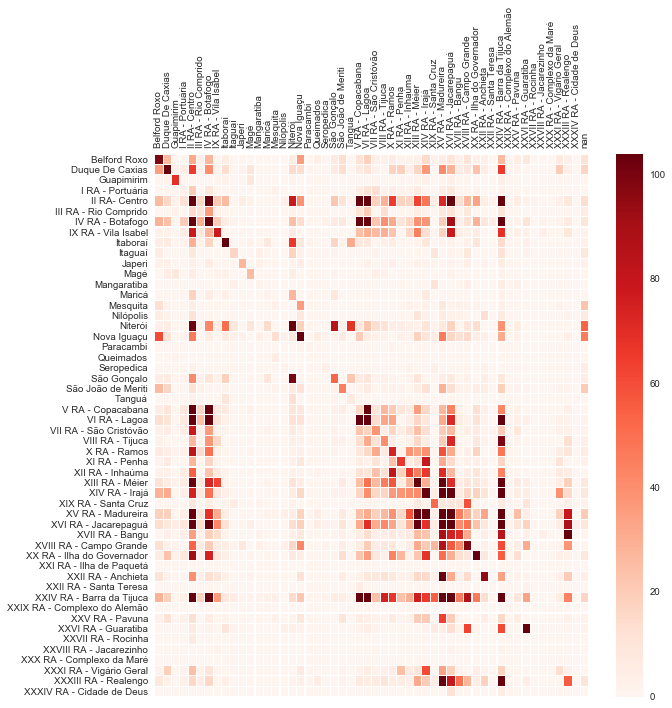

In [350]:
#Heatmap da matriz OD auto
sns.set(font_scale=1)
sns.set_style({"savefig.dpi": 70})

ax = sns.heatmap(OD_auto, cmap='Reds', robust=True ,linewidths=.1)

ax.xaxis.tick_top()
plt.xticks(rotation=90)

fig = ax.get_figure()
fig.set_size_inches(10, 10)
fig.savefig("OD_auto.png")

#### Ônibus

In [328]:
bus = dataset_sorted[dataset_sorted.Modal == 'Onibus'].reset_index(drop=True)

OD_bus = pd.DataFrame(0, index = RA, columns = RA)

In [329]:
for b in tqdm(RA):
    
    for i in range(len(bus)):     

        if bus.loc[i,'Orig_RA'] == b:

            OD_bus.loc[b, bus.loc[i,'Dest_RA']] += 1 
            
    if sum(OD_bus.loc[b]) == 0:
        
        OD_bus.drop(b, axis = 0, inplace = True)

for b in tqdm(RA):
    
    if sum(OD_bus.loc[:,b]) == 0:
        
        OD_bus.drop(b, axis = 1, inplace = True)
        
OD_bus

,Belford Roxo,Duque De Caxias,Guapimirim,I RA - Portuária,II RA- Centro,III RA - Rio Comprido,IV RA - Botafogo,IX RA - Vila Isabel,Itaboraí,Itaguaí,...,XXIX RA - Complexo do Alemão,XXV RA - Pavuna,XXVI RA - Guaratiba,XXVII RA - Rocinha,XXVIII RA - Jacarezinho,XXX RA - Complexo da Maré,XXXI RA - Vigário Geral,XXXIII RA - Realengo,XXXIV RA - Cidade de Deus,nan
Belford Roxo,44,53,0,0,62,3,15,5,3,0,...,0,14,0,1,0,0,1,0,0,18
Duque De Caxias,36,305,0,8,110,2,16,3,4,2,...,0,3,0,0,1,0,21,5,1,21
Guapimirim,0,2,9,2,11,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,2
I RA - Portuária,3,2,1,6,17,8,11,1,0,0,...,0,0,0,0,0,0,4,3,0,2
II RA- Centro,30,90,9,7,21,6,204,45,15,0,...,0,21,4,0,0,1,33,29,2,22
III RA - Rio Comprido,1,2,0,5,7,5,29,15,1,0,...,0,1,0,0,0,0,0,3,0,1
IV RA - Botafogo,24,27,1,11,236,42,208,33,4,0,...,0,3,0,0,0,1,2,7,2,4
IX RA - Vila Isabel,5,10,0,1,99,20,64,57,2,0,...,1,6,0,0,1,0,13,8,5,0
Itaboraí,2,4,0,0,39,0,2,0,125,0,...,0,1,0,0,0,0,0,0,0,17
Itaguaí,0,2,0,0,0,0,0,0,0,4,...,0,0,2,0,0,0,0,0,1,4


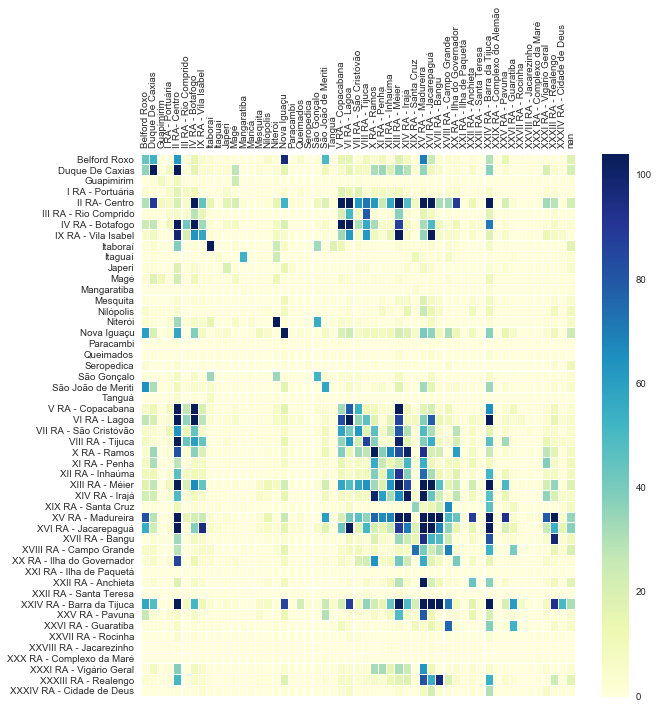

In [348]:
#Heatmap da matriz OD bus
sns.set(font_scale=1)
sns.set_style({"savefig.dpi": 70})

ax = sns.heatmap(OD_bus, cmap='YlGnBu', robust=True ,linewidths=.1)

ax.xaxis.tick_top()
plt.xticks(rotation=90)

fig = ax.get_figure()

fig.set_size_inches(10, 10)
fig.savefig("OD_bus.png")

#### Metrô

In [334]:
metro = dataset_sorted[dataset_sorted.Modal == 'Metro'].reset_index(drop=True)

OD_metro = pd.DataFrame(0, index = RA, columns = RA)

In [335]:
for b in tqdm(RA):
    
    for i in range(len(metro)):     

        if metro.loc[i,'Orig_RA'] == b:

            OD_metro.loc[b, metro.loc[i,'Dest_RA']] += 1 
            
    if sum(OD_metro.loc[b]) == 0:
        
        OD_metro.drop(b, axis = 0, inplace = True)

for b in tqdm(RA):
    
    if sum(OD_metro.loc[:,b]) == 0:
        
        OD_metro.drop(b, axis = 1, inplace = True)
        
OD_metro

,Belford Roxo,Duque De Caxias,FORA_RMRJ,Guapimirim,I RA - Portuária,II RA- Centro,III RA - Rio Comprido,IV RA - Botafogo,IX RA - Vila Isabel,Itaboraí,...,XXII RA - Anchieta,XXII RA - Santa Teresa,XXIV RA - Barra da Tijuca,XXV RA - Pavuna,XXVI RA - Guaratiba,XXVII RA - Rocinha,XXVIII RA - Jacarezinho,XXXI RA - Vigário Geral,XXXIII RA - Realengo,nan
Belford Roxo,1,0,0,0,0,28,4,32,6,0,...,0,0,2,3,0,0,0,0,0,2
Duque De Caxias,0,0,0,0,0,23,5,21,1,0,...,0,0,0,1,0,0,0,0,0,1
FORA_RMRJ,0,0,0,0,0,2,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
Guapimirim,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
I RA - Portuária,0,0,0,0,1,3,6,1,0,0,...,0,0,0,3,0,0,0,0,0,1
II RA- Centro,12,11,0,0,0,81,47,150,43,0,...,6,0,11,159,0,0,0,4,5,13
III RA - Rio Comprido,7,11,0,0,0,284,9,123,9,0,...,2,1,7,78,0,0,0,3,5,57
IV RA - Botafogo,19,26,2,0,0,570,89,96,57,1,...,12,0,16,162,0,0,1,5,10,28
IX RA - Vila Isabel,7,2,0,0,0,133,4,48,0,0,...,0,0,2,74,0,0,0,0,1,2
Itaboraí,0,0,0,0,0,0,1,1,0,1,...,0,0,0,1,0,0,0,0,0,0


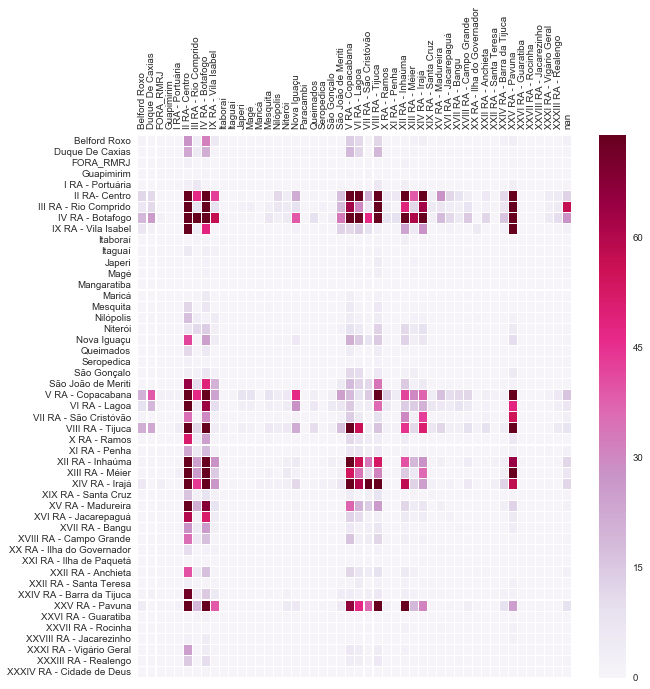

In [341]:
#Heatmap da matriz OD metrô
sns.set(font_scale=1)
sns.set_style({"savefig.dpi": 70})
# plot it out
ax = sns.heatmap(OD_metro, cmap='PuRd', robust = True ,linewidths=.1)
# set the x-axis labels on the top
ax.xaxis.tick_top()
# rotate the x-axis labels
plt.xticks(rotation=90)
# get figure (usually obtained via "fig,ax=plt.subplots()" with matplotlib)
fig = ax.get_figure()
# specify dimensions and save
fig.set_size_inches(10, 10)
fig.savefig("OD_metro.png")

#### Trem

In [336]:
trem = dataset_sorted[dataset_sorted.Modal == 'Trem'].reset_index(drop=True)

OD_trem = pd.DataFrame(0, index = RA, columns = RA)

In [337]:
for b in tqdm(RA):
    
    for i in range(len(trem)):     

        if trem.loc[i,'Orig_RA'] == b:

            OD_trem.loc[b, trem.loc[i,'Dest_RA']] += 1 
       
    if sum(OD_trem.loc[b]) == 0:
        
        OD_trem.drop(b, axis = 0, inplace = True)

for b in tqdm(RA):
    
    if sum(OD_trem.loc[:,b]) == 0:
        
        OD_trem.drop(b, axis = 1, inplace = True)
        
OD_trem

,Belford Roxo,Duque De Caxias,FORA_RMRJ,Guapimirim,I RA - Portuária,II RA- Centro,III RA - Rio Comprido,IV RA - Botafogo,IX RA - Vila Isabel,Itaboraí,...,XXIX RA - Complexo do Alemão,XXV RA - Pavuna,XXVI RA - Guaratiba,XXVII RA - Rocinha,XXVIII RA - Jacarezinho,XXX RA - Complexo da Maré,XXXI RA - Vigário Geral,XXXIII RA - Realengo,XXXIV RA - Cidade de Deus,nan
Belford Roxo,22,7,2,0,0,130,6,36,37,1,...,0,9,0,0,8,0,0,2,0,6
Duque De Caxias,5,294,7,3,5,231,14,79,92,1,...,1,6,1,0,2,1,32,5,1,2
FORA_RMRJ,1,1,1,0,0,10,0,3,2,0,...,0,0,0,0,0,0,0,0,0,0
Guapimirim,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,2,0,1
I RA - Portuária,1,2,0,0,0,3,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
II RA- Centro,63,89,3,0,0,20,1,1,3,0,...,0,6,0,0,0,0,4,80,0,10
III RA - Rio Comprido,4,3,0,0,0,2,1,0,1,0,...,0,1,0,0,0,0,0,3,0,0
IV RA - Botafogo,23,17,1,0,0,2,0,2,1,0,...,0,0,0,0,0,0,2,15,0,6
IX RA - Vila Isabel,21,23,2,1,0,4,0,1,0,0,...,0,4,2,0,0,0,0,17,0,2
Itaboraí,0,1,0,0,0,0,0,0,0,3,...,0,0,0,0,1,0,0,1,0,0


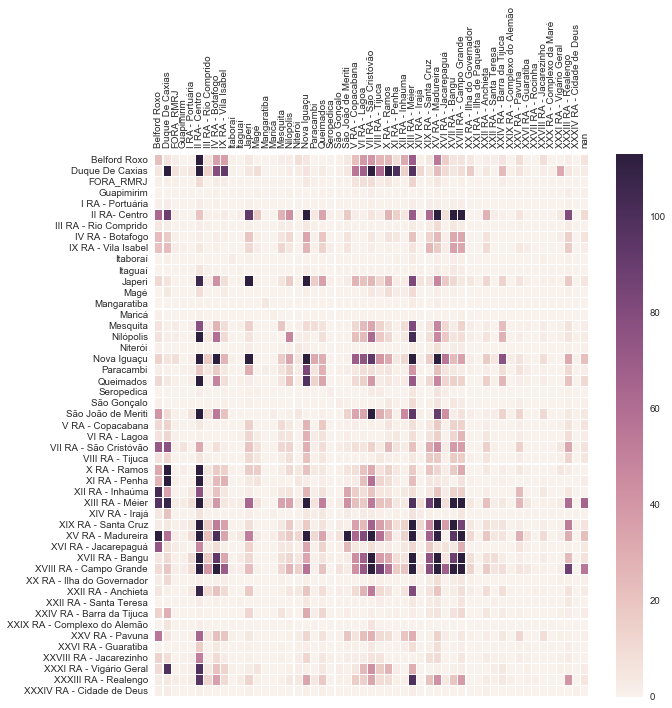

In [354]:
#Heatmap da matriz OD trem
sns.set(font_scale=1)
sns.set_style({"savefig.dpi": 70})

c = sns.color_palette("husl", 8)

ax = sns.heatmap(OD_trem, robust = True, linewidths=.1)

ax.xaxis.tick_top()
plt.xticks(rotation=90)

fig = ax.get_figure()

fig.set_size_inches(10, 10)
fig.savefig("OD_trem.png")

#### Barcas

In [314]:
barcas = dataset_sorted[dataset_sorted.Modal == 'Barca'].reset_index(drop=True)

OD_barcas = pd.DataFrame(0, index=RA, columns = RA)

In [315]:
for b in tqdm(RA):
    
    for i in range(len(barcas)):     

        if barcas.loc[i,'Orig_RA'] == b:

            OD_barcas.loc[b, barcas.loc[i,'Dest_RA']] += 1 
        
    if sum(OD_barcas.loc[b]) == 0:
        
        OD_barcas.drop(b, axis = 0, inplace = True)

for b in tqdm(RA):
    
    if sum(OD_barcas.loc[:,b]) == 0:
        
        OD_barcas.drop(b, axis = 1, inplace = True)
        
OD_barcas

|----------| 0/54   0% [elapsed: 00:00 left: ?, ? iters/sec]

,FORA_RMRJ,I RA - Portuária,II RA- Centro,III RA - Rio Comprido,IV RA - Botafogo,IX RA - Vila Isabel,Itaboraí,Maricá,Niterói,Nova Iguaçu,...,XVI RA - Jacarepaguá,XVII RA - Bangu,XVIII RA - Campo Grande,XX RA - Ilha do Governador,XXII RA - Anchieta,XXIV RA - Barra da Tijuca,XXV RA - Pavuna,XXXI RA - Vigário Geral,XXXIII RA - Realengo,nan
Duque De Caxias,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
FORA_RMRJ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
I RA - Portuária,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
II RA- Centro,0,0,0,0,0,0,3,10,395,0,...,0,0,0,235,0,0,0,0,0,1
III RA - Rio Comprido,0,0,0,0,0,0,0,0,7,0,...,0,0,0,2,0,0,0,0,0,0
IV RA - Botafogo,0,0,0,0,0,0,0,0,40,0,...,0,0,0,66,0,0,0,0,0,0
IX RA - Vila Isabel,0,0,0,0,0,0,0,0,12,0,...,0,0,0,1,0,0,0,0,0,0
Itaboraí,0,0,13,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
Maricá,0,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
Niterói,1,2,730,8,89,7,0,0,0,1,...,2,7,6,3,0,10,12,1,4,0


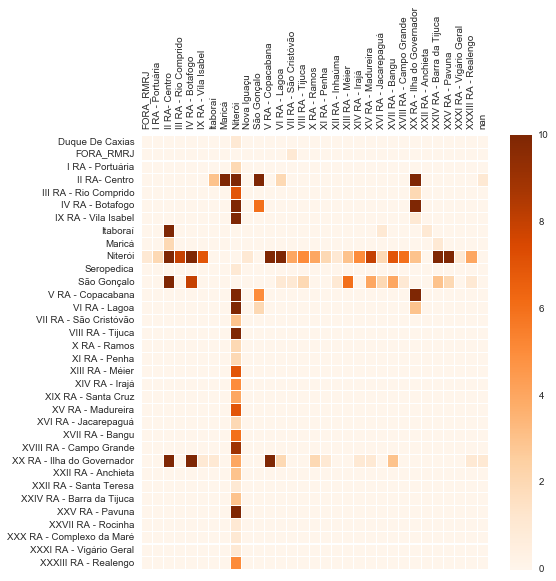

In [347]:
#Heatmap da matriz OD barcas
sns.set(font_scale=1)
sns.set_style({"savefig.dpi": 70})

ax = sns.heatmap(OD_barcas, cmap='Oranges', robust=True,linewidths=.1)

ax.xaxis.tick_top()
plt.xticks(rotation=90)

fig = ax.get_figure()

fig.set_size_inches(8, 8)
fig.savefig("OD_barcas.png")

#### Deslocamentos RA - Centro por Modal

In [143]:
centro = {}
j = 0
for i in OD_auto:
    centro[i] = list(OD_auto['II RA- Centro'])[j]
    j+=1
centro_auto = dict(Counter(centro).most_common(5))

j = 0
for i in OD_bus:
    centro[i] = list(OD_bus['II RA- Centro'])[j]
    j+=1
centro_bus = dict(Counter(centro).most_common(5))
    
j = 0
for i in OD_metro:
    centro[i] = list(OD_metro['II RA- Centro'])[j]
    j+=1
centro_metro = dict(Counter(centro).most_common(5))
    
j = 0
for i in OD_trem:
    centro[i] = list(OD_trem['II RA- Centro'])[j]
    j+=1
centro_trem = dict(Counter(centro).most_common(5))

j = 0
for i in OD_barcas:
    centro[i] = list(OD_barcas['II RA- Centro'])[j]
    j+=1
centro_barcas = dict(Counter(centro).most_common(5))


Populating the interactive namespace from numpy and matplotlib


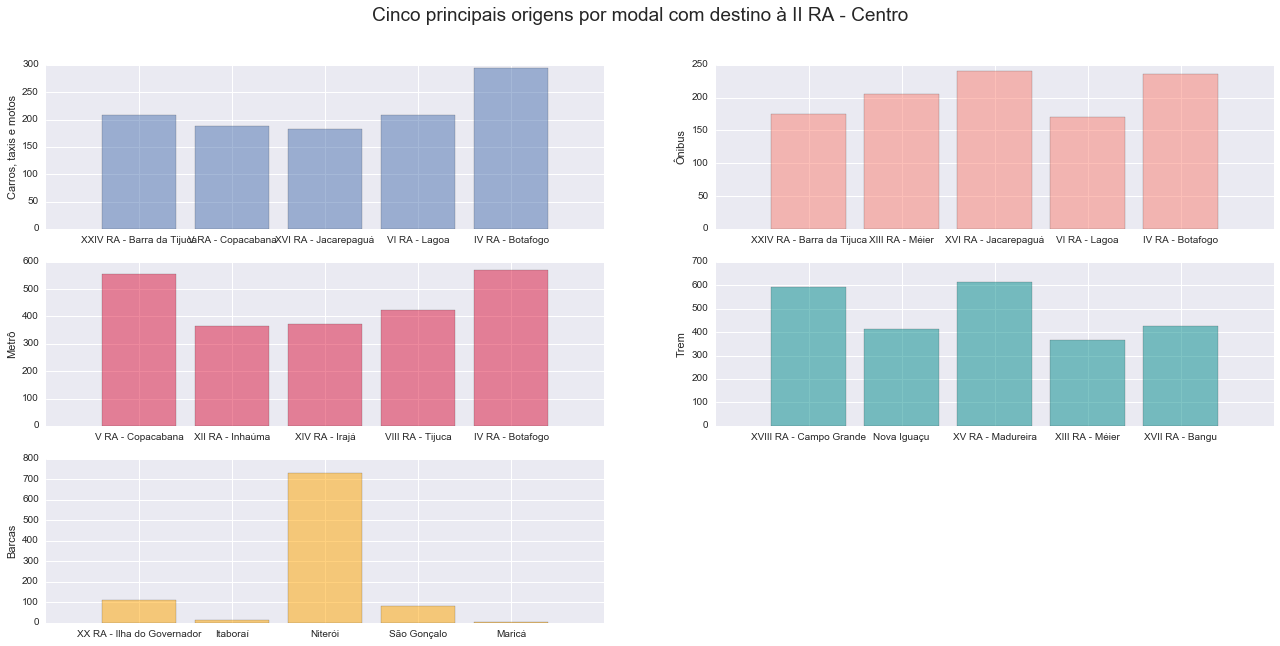

In [199]:
%pylab inline
pylab.rcParams['figure.figsize'] = (22, 10)

plt.figure()
plt.suptitle('Cinco principais origens por modal com destino à II RA - Centro', fontsize = 19)

plt.subplot(3,2,1)
plt.bar(range(len(centro_auto)), centro_auto.values(), align='center', alpha=0.5)
plt.xticks(range(len(centro_auto)), centro_auto.keys())
plt.ylabel('Carros, taxis e motos')

plt.subplot(3,2,2)
plt.bar(range(len(centro_bus)), centro_bus.values(), align='center', color='salmon', alpha=0.5)
plt.xticks(range(len(centro_bus)), centro_bus.keys())
plt.ylabel('Ônibus')

plt.subplot(3,2,3)
plt.bar(range(len(centro_metro)), centro_metro.values(), align='center',  color='crimson', alpha=0.5)
plt.xticks(range(len(centro_metro)), centro_metro.keys())
plt.ylabel('Metrô')

plt.subplot(3,2,4)
plt.bar(range(len(centro_trem)), centro_trem.values(), align='center',  color='darkcyan', alpha=0.5)
plt.xticks(range(len(centro_trem)), centro_trem.keys())
plt.ylabel('Trem')

plt.subplot(3,2,5)
plt.bar(range(len(centro_barcas)), centro_barcas.values(), align='center',  color='orange', alpha=0.5)
plt.xticks(range(len(centro_barcas)), centro_barcas.keys())
plt.ylabel('Barcas')

## Matriz origem-destino por Motivo

Primeiro vamos ver como estão aparecendo os motivos no dataset para padronizá-los:

In [235]:
dataset["Motivo"].value_counts()

Trabalho             50747
Casa                 21174
Outros               11813
Lazer                 3650
Escola                2472
Estudo                1984
Saúde                 1813
Compras               1726
TRABALHO               875
trabalho               663
Saude                  576
outros                 526
Negocios               375
Negócios               313
Lazer/Compras          109
escola                  57
saúde                   47
negócios                18
Trabalho/Negócios       12
Não informado            5
ESCOLA                   1
Name: Motivo, dtype: int64

In [236]:
dataset = dataset.replace(['Lazer','Estudo','Compras','TRABALHO', 'trabalho', 'Saude', 'outros', 'Negocios', 'Negócios', 'escola',
                          'saúde','negócios','Trabalho/Negócios','Não informado', 'ESCOLA'], 
                          ['Lazer/Compras', 'Escola', 'Lazer/Compras', 'Trabalho', 'Trabalho', 'Saúde', 'Outros', 'Trabalho', 
                           'Trabalho', 'Escola', 'Saúde', 'Trabalho', 'Trabalho', 'Outros', 'Escola'])

dataset["Motivo"].value_counts()

Trabalho         53003
Casa             21174
Outros           12344
Lazer/Compras     5485
Escola            4514
Saúde             2436
Name: Motivo, dtype: int64

In [237]:
#Ordenando o dataset
dataset_sorted = dataset.sort_values(['Motivo','Orig_RA','Dest_RA'])

#### Trabalho

In [276]:
trabalho = dataset_sorted[dataset_sorted.Motivo == 'Trabalho'].reset_index(drop=True)

OD_trabalho = pd.DataFrame(0, index=RA, columns = RA)

In [357]:
for b in tqdm(RA):
    
    for i in range(len(trabalho)):     

        if trabalho.loc[i,'Orig_RA'] == b:

            OD_trabalho.loc[b, trabalho.loc[i,'Dest_RA']] += 1 
            
    if sum(OD_trabalho.loc[b]) == 0:
        
        OD_trabalho.drop(b, axis = 0, inplace = True)

for b in tqdm(RA):
    
    if sum(OD_trabalho.loc[:,b]) == 0:
        
        OD_trabalho.drop(b, axis = 1, inplace = True)
        
OD_trabalho

,Belford Roxo,Duque De Caxias,FORA_RMRJ,Guapimirim,I RA - Portuária,II RA- Centro,III RA - Rio Comprido,IV RA - Botafogo,IX RA - Vila Isabel,Itaboraí,...,XXIX RA - Complexo do Alemão,XXV RA - Pavuna,XXVI RA - Guaratiba,XXVII RA - Rocinha,XXVIII RA - Jacarezinho,XXX RA - Complexo da Maré,XXXI RA - Vigário Geral,XXXIII RA - Realengo,XXXIV RA - Cidade de Deus,nan
Belford Roxo,94,94,4,0,0,386,16,172,82,6,...,0,30,2,0,12,0,0,4,0,26
Duque De Caxias,22,598,12,8,18,678,38,234,150,24,...,0,16,2,0,4,2,46,14,2,28
FORA_RMRJ,2,2,0,0,0,20,0,8,4,0,...,0,0,0,0,0,0,0,0,0,0
Guapimirim,0,2,0,40,0,12,0,4,0,0,...,0,0,0,0,0,0,0,4,0,6
I RA - Portuária,0,2,0,0,8,42,14,26,2,0,...,0,4,0,0,0,0,2,2,0,0
II RA- Centro,96,76,2,0,8,272,70,344,60,12,...,0,192,0,0,0,0,10,136,0,34
III RA - Rio Comprido,8,10,0,2,4,406,30,234,20,2,...,0,76,0,0,0,0,2,8,0,48
IV RA - Botafogo,74,78,2,0,22,1506,182,796,100,8,...,0,224,2,2,0,0,8,38,2,50
IX RA - Vila Isabel,36,40,2,2,2,400,20,154,42,4,...,2,50,0,0,0,2,4,36,2,8
Itaboraí,4,12,0,0,0,72,2,16,0,204,...,0,2,2,0,2,0,0,2,0,16


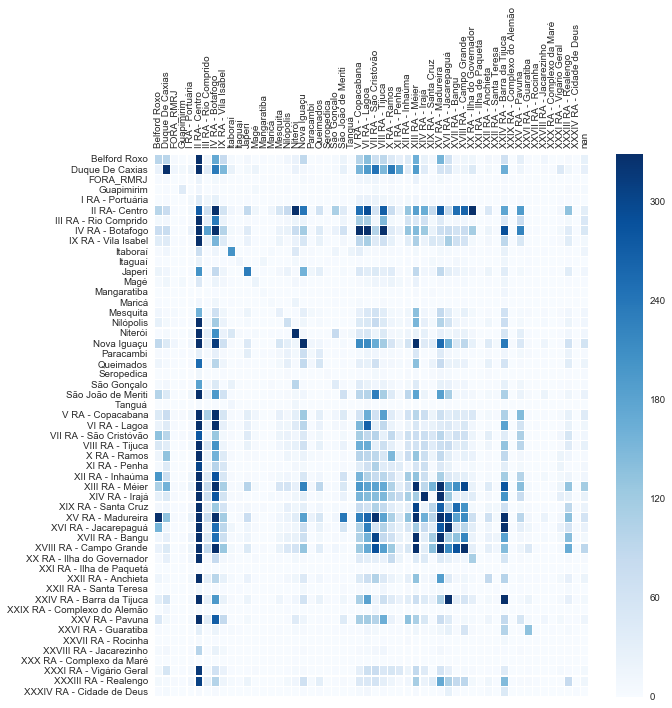

In [372]:
#Heatmap da matriz OD trabalho
sns.set(font_scale=1)
sns.set_style({"savefig.dpi": 70})

ax = sns.heatmap(OD_trabalho, cmap='Blues', robust=True ,linewidths=.1)

ax.xaxis.tick_top()
plt.xticks(rotation=90)

fig = ax.get_figure()
fig.set_size_inches(10, 10)
fig.savefig("OD_trabalho.png")

#### Casa

In [358]:
casa = dataset_sorted[dataset_sorted.Motivo == 'Casa'].reset_index(drop=True)

OD_casa = pd.DataFrame(0, index=RA, columns = RA)

In [359]:
for b in tqdm(RA):
    
    for i in range(len(casa)):     

        if casa.loc[i,'Orig_RA'] == b:

            OD_casa.loc[b, casa.loc[i,'Dest_RA']] += 1 
            
    if sum(OD_casa.loc[b]) == 0:
        
        OD_casa.drop(b, axis = 0, inplace = True)

for b in tqdm(RA):
    
    if sum(OD_casa.loc[:,b]) == 0:
        
        OD_casa.drop(b, axis = 1, inplace = True)
        
OD_casa

,Belford Roxo,Duque De Caxias,Guapimirim,I RA - Portuária,II RA- Centro,III RA - Rio Comprido,IV RA - Botafogo,IX RA - Vila Isabel,Itaboraí,Itaguaí,...,XXIV RA - Barra da Tijuca,XXV RA - Pavuna,XXVI RA - Guaratiba,XXVII RA - Rocinha,XXVIII RA - Jacarezinho,XXX RA - Complexo da Maré,XXXI RA - Vigário Geral,XXXIII RA - Realengo,XXXIV RA - Cidade de Deus,nan
Belford Roxo,53,13,0,0,2,1,1,0,3,0,...,9,3,0,0,0,0,3,0,0,2
Duque De Caxias,44,163,0,2,7,1,10,2,5,1,...,7,2,0,0,1,0,16,5,1,6
Guapimirim,1,2,26,0,0,0,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1
I RA - Portuária,3,2,1,3,2,2,6,1,0,0,...,4,0,1,0,0,0,1,3,0,2
II RA- Centro,49,93,11,8,17,14,245,50,28,0,...,141,20,2,2,0,1,34,34,2,30
III RA - Rio Comprido,1,1,0,1,1,3,11,10,0,1,...,5,1,0,0,0,0,0,3,0,4
IV RA - Botafogo,37,30,1,9,65,38,158,23,5,1,...,65,1,5,0,0,1,2,9,0,5
IX RA - Vila Isabel,4,8,0,0,3,9,9,36,1,0,...,7,6,2,0,2,0,4,10,4,1
Itaboraí,4,3,0,1,12,0,5,0,188,0,...,4,2,0,0,0,0,0,0,0,5
Itaguaí,0,1,0,0,0,0,0,0,0,5,...,1,0,3,0,0,0,0,0,0,4


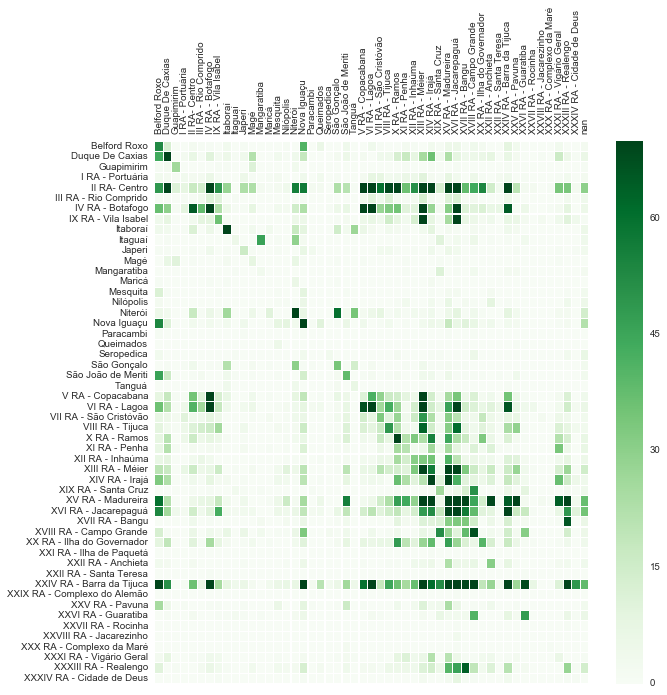

In [382]:
#Heatmap da matriz OD casa
sns.set(font_scale=1)
sns.set_style({"savefig.dpi": 70})

ax = sns.heatmap(OD_casa, cmap='Greens', robust=True, linewidths=.1)

ax.xaxis.tick_top()
plt.xticks(rotation=90)

fig = ax.get_figure()
fig.set_size_inches(10, 10)
fig.savefig("OD_casa.png")

#### Escola

In [361]:
escola = dataset_sorted[dataset_sorted.Motivo == 'Escola'].reset_index(drop=True)

OD_escola = pd.DataFrame(0, index=RA, columns = RA)

In [362]:
for b in tqdm(RA):
    
    for i in range(len(escola)):     

        if escola.loc[i,'Orig_RA'] == b:

            OD_escola.loc[b, escola.loc[i,'Dest_RA']] += 1 
            
    if sum(OD_escola.loc[b]) == 0:
        
        OD_escola.drop(b, axis = 0, inplace = True)

for b in tqdm(RA):
    
    if sum(OD_escola.loc[:,b]) == 0:
        
        OD_escola.drop(b, axis = 1, inplace = True)
OD_escola

,Belford Roxo,Duque De Caxias,Guapimirim,I RA - Portuária,II RA- Centro,III RA - Rio Comprido,IV RA - Botafogo,IX RA - Vila Isabel,Itaboraí,Itaguaí,...,XXII RA - Santa Teresa,XXIV RA - Barra da Tijuca,XXV RA - Pavuna,XXVI RA - Guaratiba,XXVIII RA - Jacarezinho,XXX RA - Complexo da Maré,XXXI RA - Vigário Geral,XXXIII RA - Realengo,XXXIV RA - Cidade de Deus,nan
Belford Roxo,0,1,0,0,5,2,1,4,0,0,...,0,0,0,0,0,0,0,0,0,3
Duque De Caxias,3,49,0,0,6,0,1,15,0,1,...,0,1,0,0,0,0,0,0,0,2
FORA_RMRJ,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Guapimirim,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
I RA - Portuária,0,0,1,0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
II RA- Centro,0,2,0,0,7,0,13,4,1,0,...,0,6,2,0,0,0,0,2,0,0
III RA - Rio Comprido,1,1,0,0,12,2,8,0,0,0,...,0,0,3,0,0,0,0,0,0,3
IV RA - Botafogo,2,0,0,0,34,5,12,6,0,0,...,0,4,2,0,0,0,0,0,0,0
IX RA - Vila Isabel,1,0,0,0,14,6,11,13,0,0,...,0,0,7,2,0,0,0,3,0,0
Itaboraí,0,1,0,0,1,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0


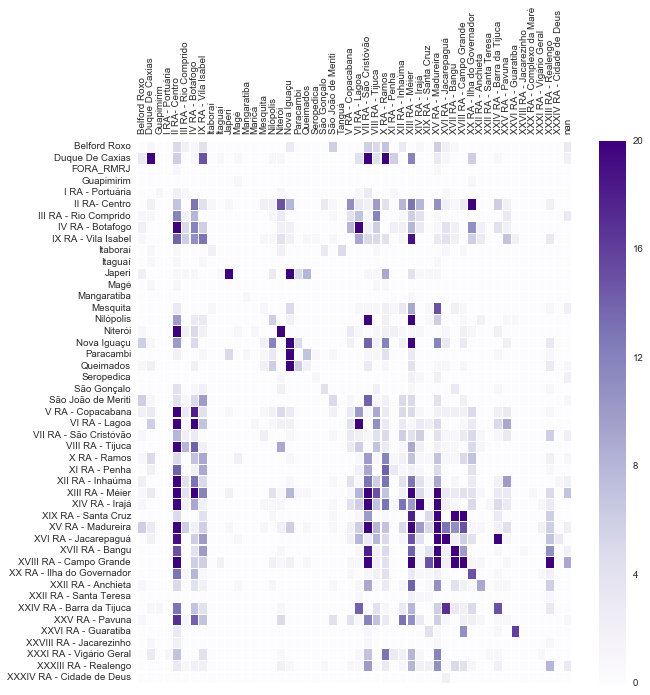

In [374]:
#Heatmap da matriz OD escola
sns.set(font_scale=1)
sns.set_style({"savefig.dpi": 70})

ax = sns.heatmap(OD_escola, cmap='Purples', robust=True, linewidths=.1)

ax.xaxis.tick_top()
plt.xticks(rotation=90)

fig = ax.get_figure()
fig.set_size_inches(10, 10)
fig.savefig("OD_escola.png")

#### Saúde

In [364]:
saude = dataset_sorted[dataset_sorted.Motivo == 'Saúde'].reset_index(drop=True)

OD_saude = pd.DataFrame(0, index=RA, columns = RA)

In [365]:
for b in tqdm(RA):
    
    for i in range(len(saude)):     

        if saude.loc[i,'Orig_RA'] == b:

            OD_saude.loc[b, saude.loc[i,'Dest_RA']] += 1 
    
    if sum(OD_saude.loc[b]) == 0:
        
        OD_saude.drop(b, axis = 0, inplace = True)

for b in tqdm(RA):
    
    if sum(OD_saude.loc[:,b]) == 0:
        
        OD_saude.drop(b, axis = 1, inplace = True)
        
OD_saude

,Belford Roxo,Duque De Caxias,FORA_RMRJ,I RA - Portuária,II RA- Centro,III RA - Rio Comprido,IV RA - Botafogo,IX RA - Vila Isabel,Itaboraí,Itaguaí,...,XX RA - Ilha do Governador,XXII RA - Anchieta,XXII RA - Santa Teresa,XXIV RA - Barra da Tijuca,XXV RA - Pavuna,XXVI RA - Guaratiba,XXVIII RA - Jacarezinho,XXXI RA - Vigário Geral,XXXIII RA - Realengo,nan
Belford Roxo,1,0,0,0,6,2,1,0,0,0,...,1,0,0,0,1,0,0,0,0,2
Duque De Caxias,0,35,0,0,5,0,3,1,0,0,...,1,0,0,0,0,0,0,1,1,0
FORA_RMRJ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Guapimirim,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
I RA - Portuária,0,0,0,0,4,2,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0
II RA- Centro,3,0,0,0,5,3,9,5,1,0,...,3,1,0,3,4,0,0,0,3,0
III RA - Rio Comprido,0,0,0,0,8,0,4,1,0,1,...,0,0,0,1,3,0,0,0,1,1
IV RA - Botafogo,0,1,0,0,27,3,11,2,1,0,...,2,0,0,2,1,0,1,0,1,1
IX RA - Vila Isabel,1,2,0,0,10,0,4,5,0,0,...,0,0,0,1,3,0,0,0,0,0
Itaboraí,1,0,0,0,3,1,0,0,2,0,...,0,0,0,1,0,0,0,0,0,0


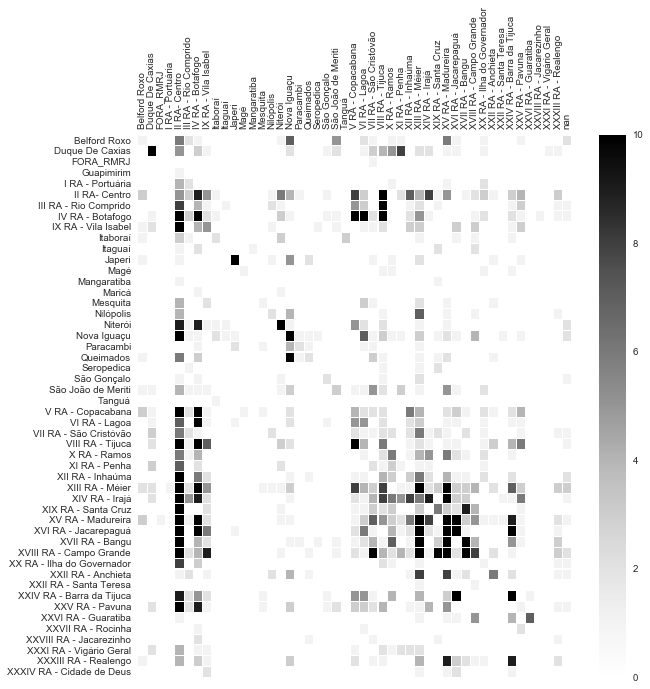

In [375]:
#Heatmap da matriz OD saúde
sns.set(font_scale=1)
sns.set_style({"savefig.dpi": 70})

ax = sns.heatmap(OD_saude, cmap='Greys',robust=True ,linewidths=.1)

ax.xaxis.tick_top()
plt.xticks(rotation=90)

fig = ax.get_figure()
fig.set_size_inches(10, 10)
fig.savefig("OD_saude.png")

#### Lazer/Compras

In [367]:
lazer = dataset_sorted[dataset_sorted.Motivo == 'Lazer/Compras'].reset_index(drop=True)

OD_lazer = pd.DataFrame(0, index=RA, columns = RA)

In [368]:
for b in tqdm(RA):
    
    for i in range(len(lazer)):     

        if lazer.loc[i,'Orig_RA'] == b:

            OD_lazer.loc[b, lazer.loc[i,'Dest_RA']] += 1 
    
    if sum(OD_lazer.loc[b]) == 0:
        
        OD_lazer.drop(b, axis = 0, inplace = True)

for b in tqdm(RA):
    
    if sum(OD_lazer.loc[:,b]) == 0:
        
        OD_lazer.drop(b, axis = 1, inplace = True)
        
OD_lazer

,Belford Roxo,Duque De Caxias,FORA_RMRJ,Guapimirim,I RA - Portuária,II RA- Centro,III RA - Rio Comprido,IV RA - Botafogo,IX RA - Vila Isabel,Itaboraí,...,XXII RA - Anchieta,XXII RA - Santa Teresa,XXIV RA - Barra da Tijuca,XXV RA - Pavuna,XXVI RA - Guaratiba,XXVIII RA - Jacarezinho,XXXI RA - Vigário Geral,XXXIII RA - Realengo,XXXIV RA - Cidade de Deus,nan
Belford Roxo,21,3,0,0,0,8,0,4,0,2,...,0,0,7,1,2,0,0,0,0,7
Duque De Caxias,2,55,0,0,1,22,0,2,1,0,...,0,0,10,0,0,0,2,0,0,3
FORA_RMRJ,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Guapimirim,0,1,0,7,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
I RA - Portuária,0,0,0,0,0,2,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
II RA- Centro,0,37,0,0,1,4,4,21,1,1,...,1,0,6,2,2,0,1,2,0,0
III RA - Rio Comprido,0,1,0,0,0,13,0,8,2,0,...,1,0,1,7,0,0,0,0,0,3
IV RA - Botafogo,0,3,0,0,1,36,2,62,2,0,...,0,0,27,7,0,0,1,0,0,2
IX RA - Vila Isabel,0,1,0,0,0,11,0,6,8,0,...,0,0,4,1,0,1,0,0,0,0
Itaboraí,1,0,0,0,0,7,0,0,0,22,...,0,0,2,0,0,0,0,0,0,1


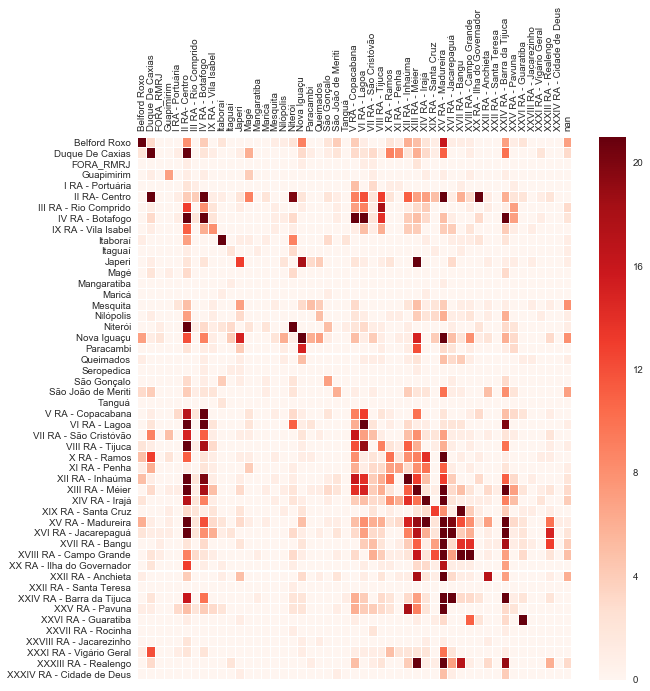

In [376]:
#Heatmap da matriz OD lazer e compras
sns.set(font_scale=1)
sns.set_style({"savefig.dpi": 70})

ax = sns.heatmap(OD_lazer, cmap='Reds',robust=True ,linewidths=.1)

ax.xaxis.tick_top()
plt.xticks(rotation=90)

fig = ax.get_figure()
fig.set_size_inches(10, 10)
fig.savefig("OD_lazer.png")

#### Outros

In [369]:
outros = dataset_sorted[dataset_sorted.Motivo == 'Outros'].reset_index(drop=True)

OD_outros = pd.DataFrame(0, index=RA, columns = RA)

In [370]:
for b in tqdm(RA):
    
    for i in range(len(outros)):     

        if outros.loc[i,'Orig_RA'] == b:

            OD_outros.loc[b, outros.loc[i,'Dest_RA']] += 1 
    
    if sum(OD_outros.loc[b]) == 0:
        
        OD_outros.drop(b, axis = 0, inplace = True)

for b in tqdm(RA):
    
    if sum(OD_outros.loc[:,b]) == 0:
        
        OD_outros.drop(b, axis = 1, inplace = True)
        
OD_outros

,Belford Roxo,Duque De Caxias,FORA_RMRJ,Guapimirim,I RA - Portuária,II RA- Centro,III RA - Rio Comprido,IV RA - Botafogo,IX RA - Vila Isabel,Itaboraí,...,XXIX RA - Complexo do Alemão,XXV RA - Pavuna,XXVI RA - Guaratiba,XXVII RA - Rocinha,XXVIII RA - Jacarezinho,XXX RA - Complexo da Maré,XXXI RA - Vigário Geral,XXXIII RA - Realengo,XXXIV RA - Cidade de Deus,nan
Belford Roxo,26,14,0,0,0,27,2,4,3,1,...,0,8,2,0,2,0,2,3,0,5
Duque De Caxias,7,168,1,2,3,33,2,6,4,1,...,1,2,1,0,0,0,12,1,0,5
FORA_RMRJ,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
Guapimirim,0,0,0,19,2,4,0,0,1,1,...,0,0,0,0,0,0,1,0,0,0
I RA - Portuária,1,2,0,0,2,10,1,0,0,0,...,0,1,0,0,0,0,2,0,0,1
II RA- Centro,27,33,2,0,1,25,8,103,14,3,...,0,58,2,0,0,0,4,12,0,5
III RA - Rio Comprido,5,8,0,2,1,46,3,22,5,1,...,0,22,0,0,0,0,2,4,0,16
IV RA - Botafogo,8,11,2,0,3,115,7,131,21,0,...,0,37,0,0,0,0,3,8,1,6
IX RA - Vila Isabel,10,7,1,0,2,38,5,21,23,0,...,0,39,1,0,0,0,6,1,1,1
Itaboraí,0,2,0,0,0,17,1,0,0,65,...,0,0,2,0,0,0,0,0,0,4


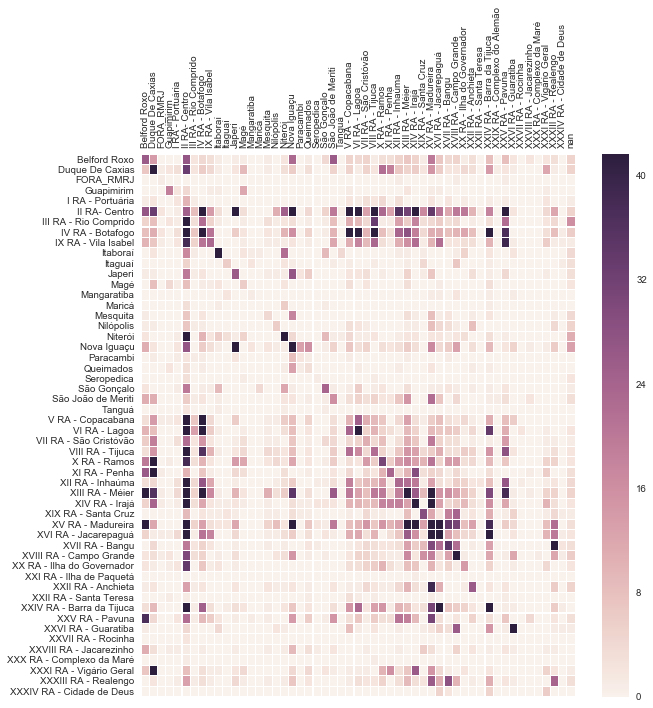

In [377]:
#Heatmap da matriz OD outros
sns.set(font_scale=1)
sns.set_style({"savefig.dpi": 70})

ax = sns.heatmap(OD_outros,robust=True ,linewidths=.1)

ax.xaxis.tick_top()
plt.xticks(rotation=90)

fig = ax.get_figure()
fig.set_size_inches(10, 10)
fig.savefig("OD_outros.png")

# FIM

In [17]:
__all__ = ['tqdm', 'trange']

import sys
import time


def format_interval(t):
    mins, s = divmod(int(t), 60)
    h, m = divmod(mins, 60)
    if h:
        return '%d:%02d:%02d' % (h, m, s)
    else:
        return '%02d:%02d' % (m, s)


def format_meter(n, total, elapsed):
    # n - number of finished iterations
    # total - total number of iterations, or None
    # elapsed - number of seconds passed since start
    if n > total:
        total = None
    
    elapsed_str = format_interval(elapsed)
    rate = '%5.2f' % (n / elapsed) if elapsed else '?'
    
    if total:
        frac = float(n) / total
        
        N_BARS = 10
        bar_length = int(frac*N_BARS)
        bar = '#'*bar_length + '-'*(N_BARS-bar_length)
        
        percentage = '%3d%%' % (frac * 100)
        
        left_str = format_interval(elapsed / n * (total-n)) if n else '?'
        
        return '|%s| %d/%d %s [elapsed: %s left: %s, %s iters/sec]' % (
            bar, n, total, percentage, elapsed_str, left_str, rate)
    
    else:
        return '%d [elapsed: %s, %s iters/sec]' % (n, elapsed_str, rate)


class StatusPrinter(object):
    def __init__(self, file):
        self.file = file
        self.last_printed_len = 0
    
    def print_status(self, s):
        self.file.write('\r'+s+' '*max(self.last_printed_len-len(s), 0))
        self.file.flush()
        self.last_printed_len = len(s)


def tqdm(iterable, desc='', total=None, leave=False, file=sys.stderr,
         mininterval=0.5, miniters=1):
    """
    Get an iterable object, and return an iterator which acts exactly like the
    iterable, but prints a progress meter and updates it every time a value is
    requested.
    'desc' can contain a short string, describing the progress, that is added
    in the beginning of the line.
    'total' can give the number of expected iterations. If not given,
    len(iterable) is used if it is defined.
    'file' can be a file-like object to output the progress message to.
    If leave is False, tqdm deletes its traces from screen after it has
    finished iterating over all elements.
    If less than mininterval seconds or miniters iterations have passed since
    the last progress meter update, it is not updated again.
    """
    if total is None:
        try:
            total = len(iterable)
        except TypeError:
            total = None
    
    prefix = desc+': ' if desc else ''
    
    sp = StatusPrinter(file)
    sp.print_status(prefix + format_meter(0, total, 0))
    
    start_t = last_print_t = time.time()
    last_print_n = 0
    n = 0
    for obj in iterable:
        yield obj
        # Now the object was created and processed, so we can print the meter.
        n += 1
        if n - last_print_n >= miniters:
            # We check the counter first, to reduce the overhead of time.time()
            cur_t = time.time()
            if cur_t - last_print_t >= mininterval:
                sp.print_status(prefix + format_meter(n, total, cur_t-start_t))
                last_print_n = n
                last_print_t = cur_t
    
    if not leave:
        sp.print_status('')
        sys.stdout.write('\r')
    else:
        if last_print_n < n:
            cur_t = time.time()
            sp.print_status(prefix + format_meter(n, total, cur_t-start_t))
        file.write('\n')


def trange(*args, **kwargs):
    """A shortcut for writing tqdm(range()) on py3 or tqdm(xrange()) on py2"""
    try:
        f = xrange
    except NameError:
        f = range
    
    return tqdm(f(*args), **kwargs)